In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
iTransf_n_windows = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000, 2000]
TranAD_n_windows = [10, 20, 30, 40, 50, 60, 70]

In [81]:
N = 25
dataset = 'SMAP'
less = False

In [106]:
loader = []
for file in ['labels']:
    if dataset == 'SMD': file = 'machine-1-1_' + file
    if dataset == 'SMAP': file = 'P-1_' + file
    if dataset == 'MSL': file = 'C-1_' + file
    if dataset == 'UCR': file = '136_' + file
    if dataset == 'NAB': file = 'ec2_request_latency_system_failure_' + file
    loader.append(np.load(os.path.join(f'processed/{dataset}', f'{file}.npy')))
true_labels = loader
print(true_labels, true_labels[0].shape, len(true_labels))

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])] (8505, 25) 1


In [87]:
TranAD_all_res = {'ROC/AUC': [], 'f1': [], 'total_loss': [], 'loss': []}
TranAD_labels = []
loss = np.zeros((len(TranAD_n_windows), N))

print(loss.shape, loss[0].shape)
for i, elem in enumerate(TranAD_n_windows):
    path = f'studies/TranAD_SMAP_2/n_window{elem}/results'
    df_res = pd.read_csv(f'{path}/all_res.csv')
    df_loss = pd.read_csv(f'{path}/test_loss.csv')
    df_labels = pd.read_csv(f'{path}/pred_labels.csv')
    TranAD_all_res['ROC/AUC'].append(df_res['ROC/AUC'])
    TranAD_all_res['f1'].append(df_res['f1'])
    TranAD_all_res['total_loss'].append(np.mean(df_loss))
    loss[i] = np.mean(df_loss, axis=0)
    TranAD_labels.append(np.array(df_labels))
TranAD_all_res['loss'] = loss
print(TranAD_labels[0].shape, len(TranAD_labels))
# print(TranAD_all_res)

(7, 25) (25,)
(8505, 25) 7


In [88]:
iTransf_all_res = {'ROC/AUC': [], 'f1': [], 'total_loss': [], 'loss': []}
loss = np.zeros((len(iTransf_n_windows), N))
iTransf_labels = []

for i, elem in enumerate(iTransf_n_windows):
    path = f'studies/iTransformer_SMAP_2/n_window{elem}/results'
    df_res = pd.read_csv(f'{path}/all_res.csv')
    df_loss = pd.read_csv(f'{path}/test_loss.csv')
    df_labels = pd.read_csv(f'{path}/pred_labels.csv')
    # print(df_res)
    iTransf_all_res['ROC/AUC'].append(df_res['ROC/AUC'])
    iTransf_all_res['f1'].append(df_res['f1'])
    iTransf_all_res['total_loss'].append(np.mean(df_loss))
    loss[i] = np.mean(df_loss, axis=0)
    iTransf_labels.append(np.array(df_labels))
iTransf_all_res['loss'] = loss
print(iTransf_labels[0].shape, len(iTransf_labels))
# print(iTransf_all_res)

(8505, 25) 14


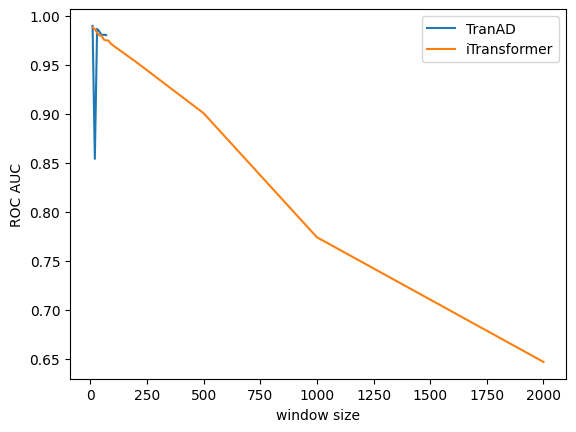

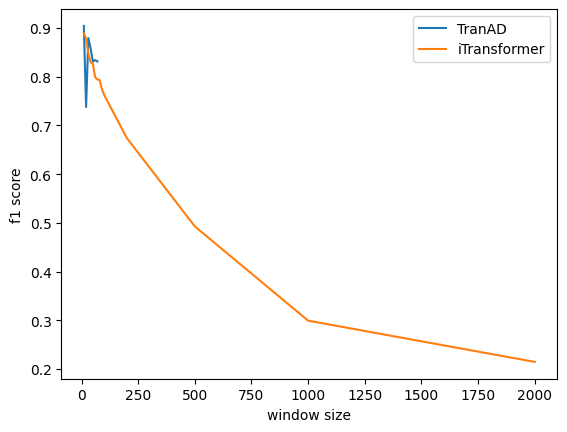

In [89]:
plt.plot(TranAD_n_windows, TranAD_all_res['ROC/AUC'], label='TranAD')
plt.plot(iTransf_n_windows, iTransf_all_res['ROC/AUC'], label='iTransformer')
plt.xlabel('window size')
plt.ylabel('ROC AUC')
plt.legend()
plt.show()

plt.plot(TranAD_n_windows, TranAD_all_res['f1'], label='TranAD')
plt.plot(iTransf_n_windows, iTransf_all_res['f1'], label='iTransformer')
plt.xlabel('window size')
plt.ylabel('f1 score')
plt.legend()
plt.show()

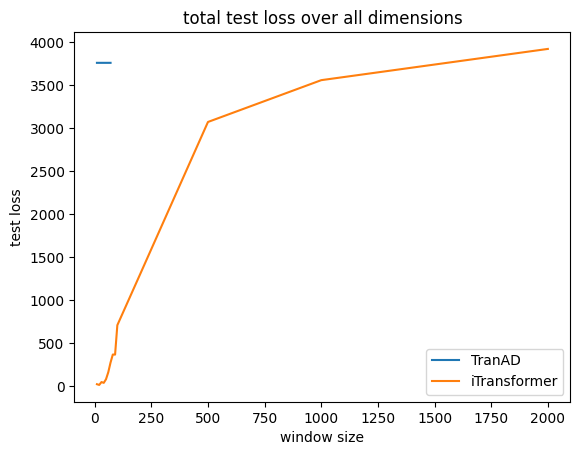

In [90]:
plt.plot(TranAD_n_windows, TranAD_all_res['total_loss'], label='TranAD')
plt.plot(iTransf_n_windows, iTransf_all_res['total_loss'], label='iTransformer')
plt.xlabel('window size')
plt.ylabel('test loss')
plt.title('total test loss over all dimensions')
plt.legend()
plt.show()

In [ ]:
print(TranAD_all_res['loss'][:,0])
for dim in range(N):
	a_s = TranAD_all_res['loss'][:,dim]
	plt.plot(TranAD_n_windows, a_s, label=f'dim = {dim}')
	plt.xlabel('window size')
	plt.ylabel('Test loss')
	plt.title(f'Average loss for dim = {dim}')
	# plt.legend()
	# plt.savefig(f'{path}/{name}.png', dpi=300)
	plt.show()

In [ ]:
for dim in range(N):
	a_s = iTransf_all_res['loss'][:,dim]
	plt.plot(iTransf_n_windows, a_s)
	plt.xlabel('window size')
	plt.ylabel('Test loss')
	plt.title(f'Average loss for dim = {dim}')
	plt.tight_layout()
	plt.show()

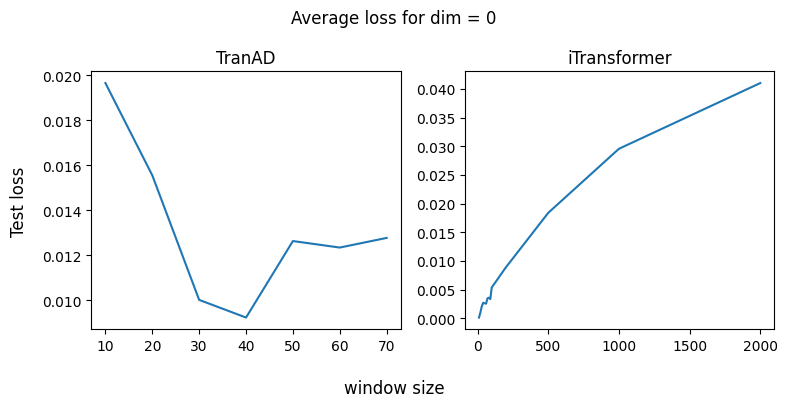

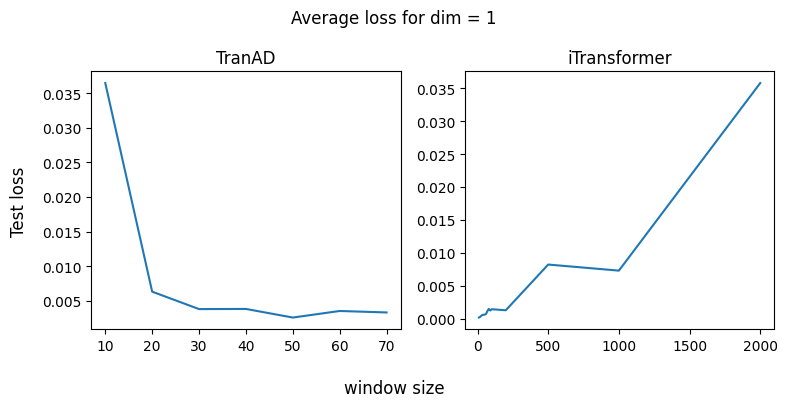

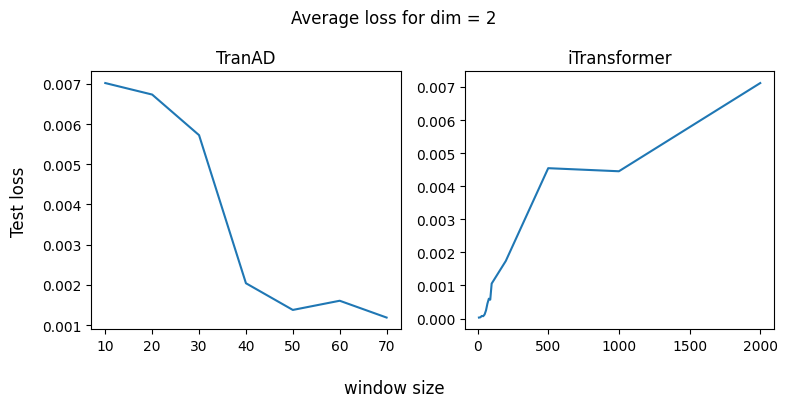

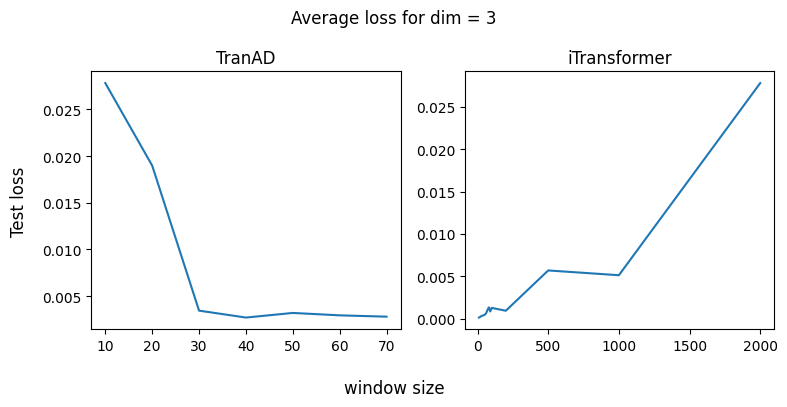

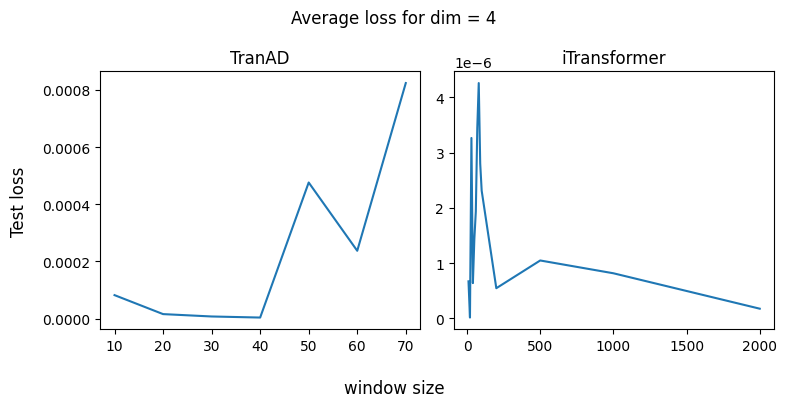

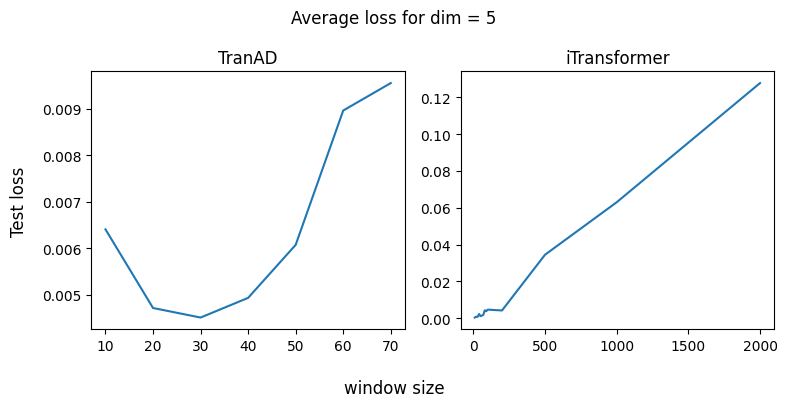

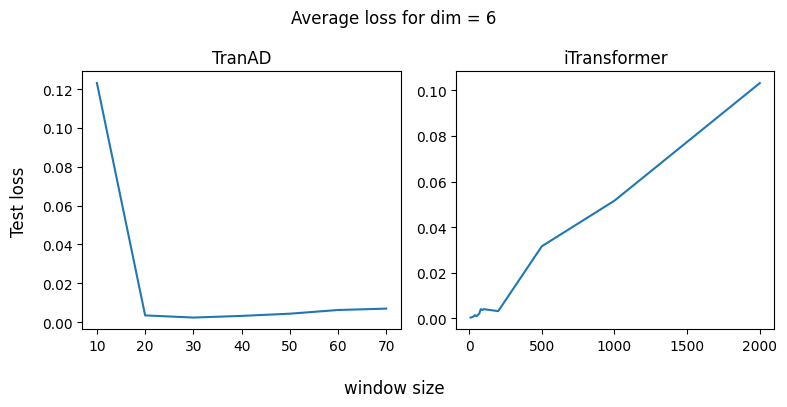

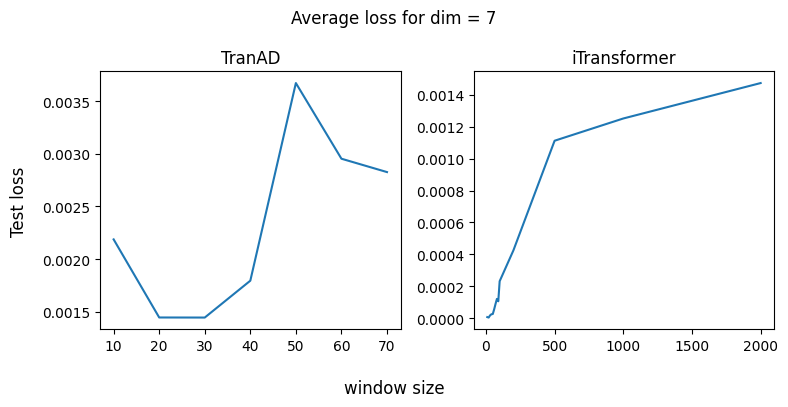

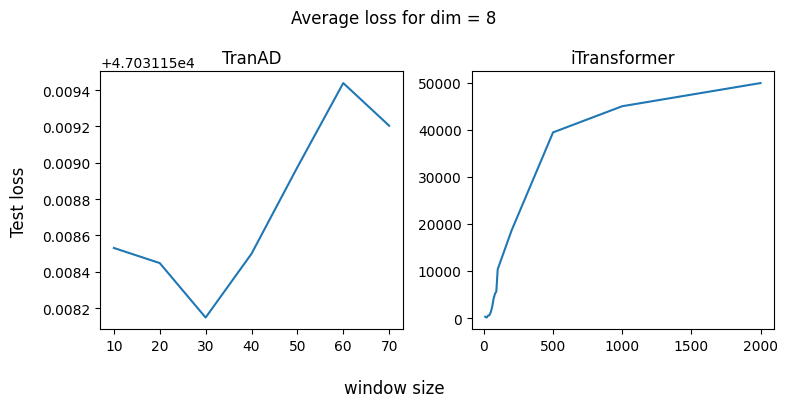

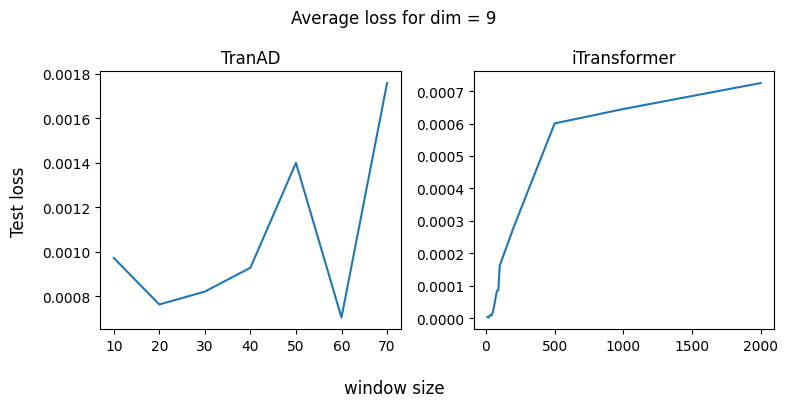

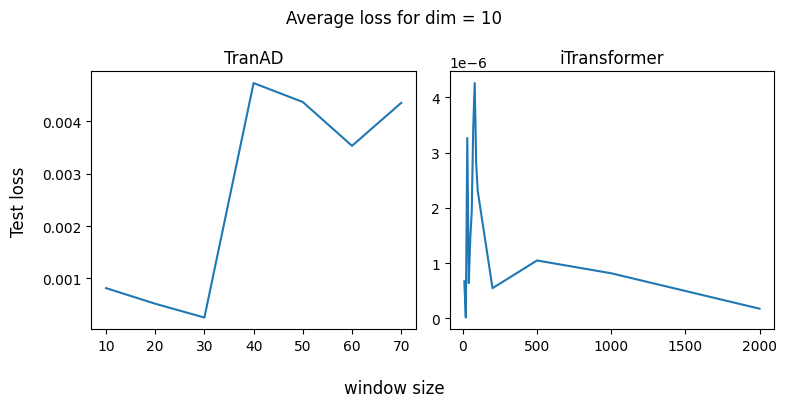

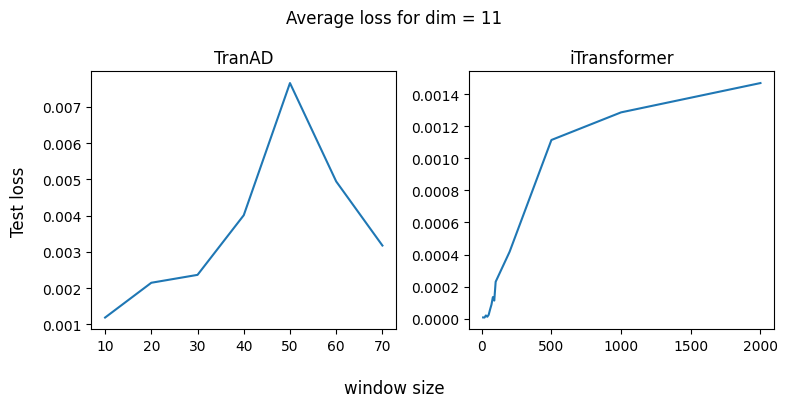

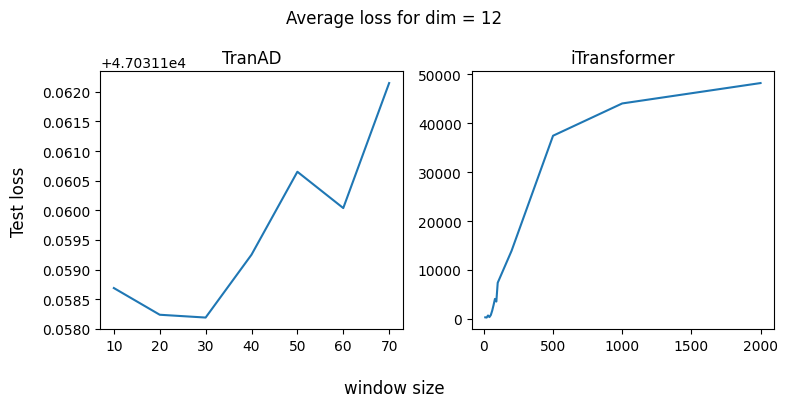

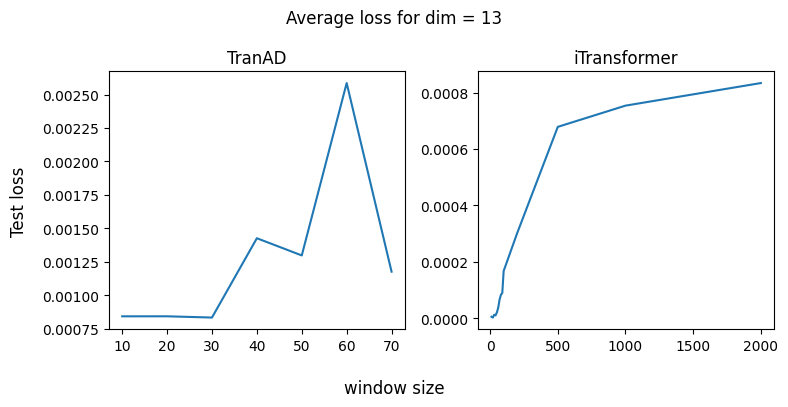

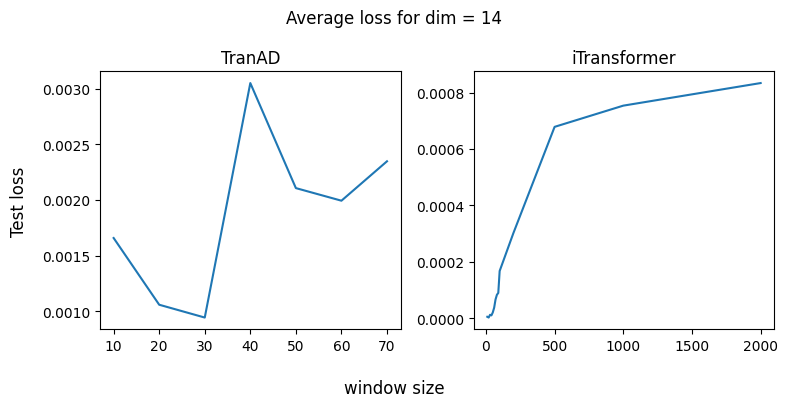

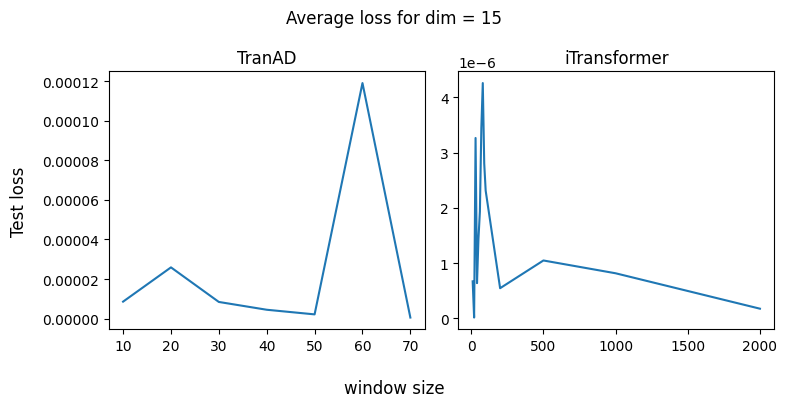

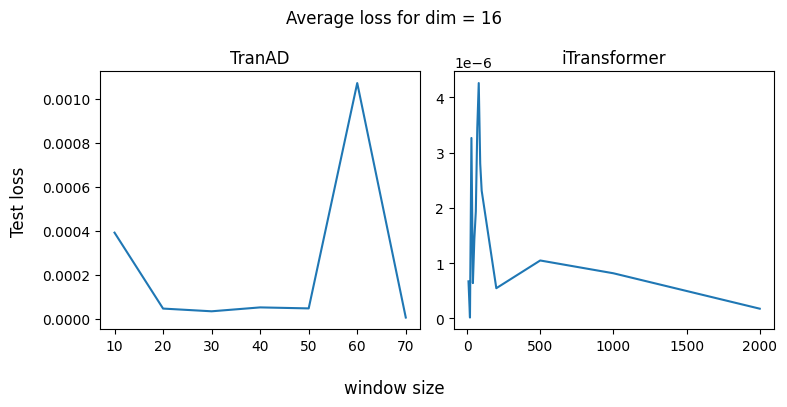

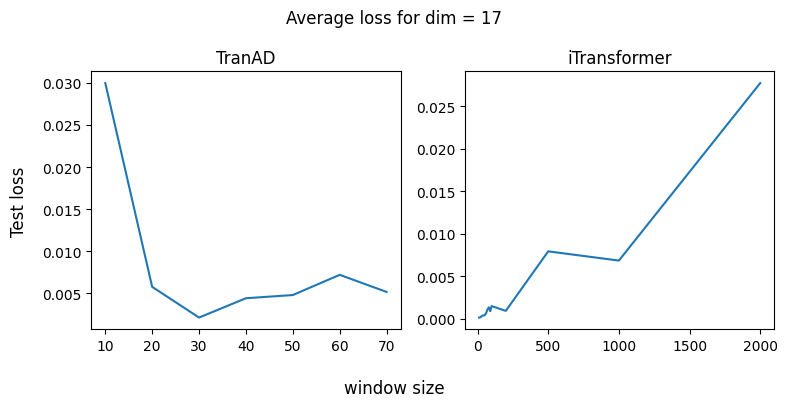

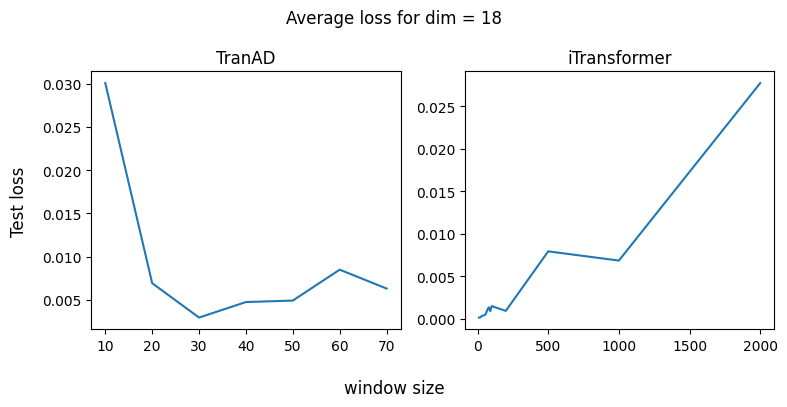

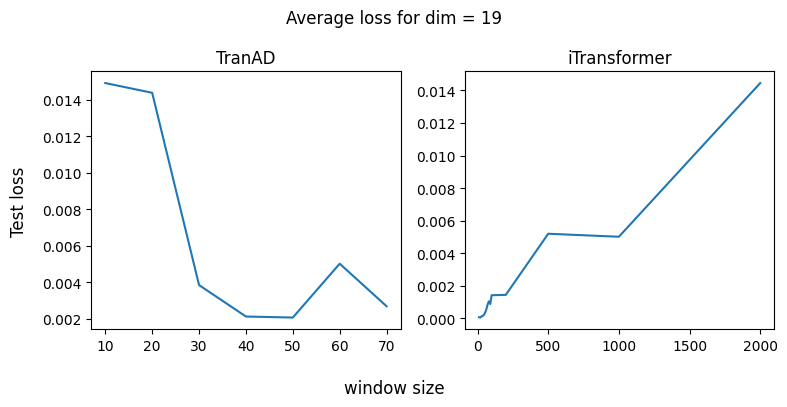

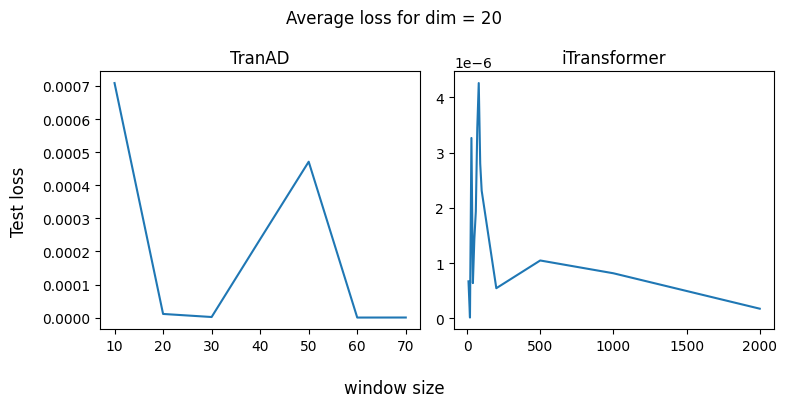

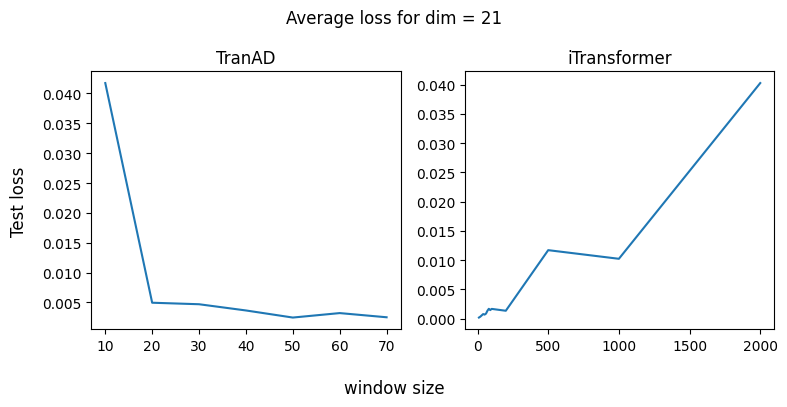

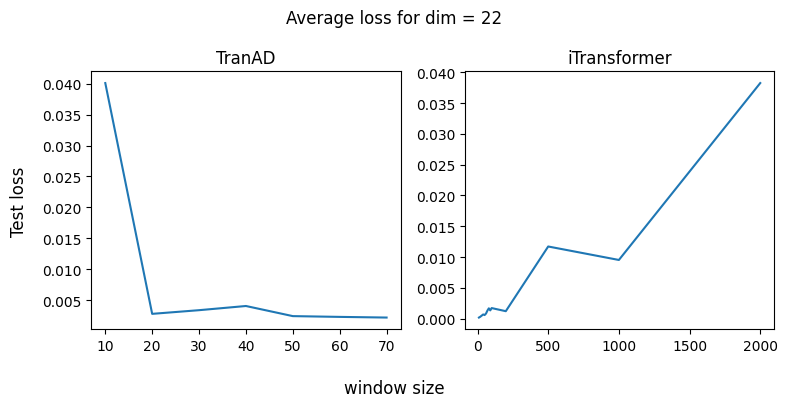

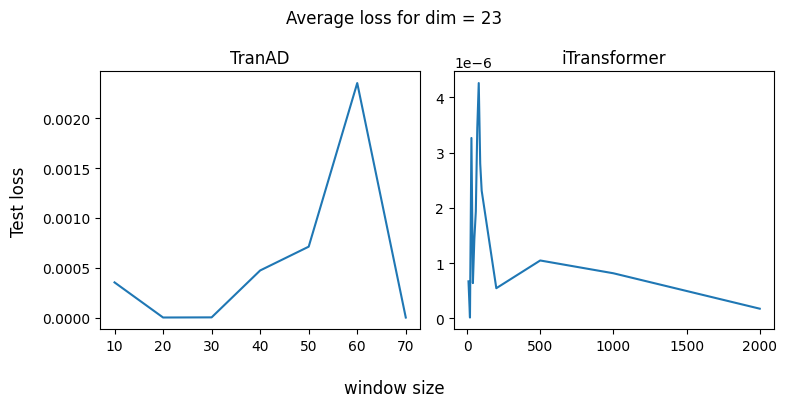

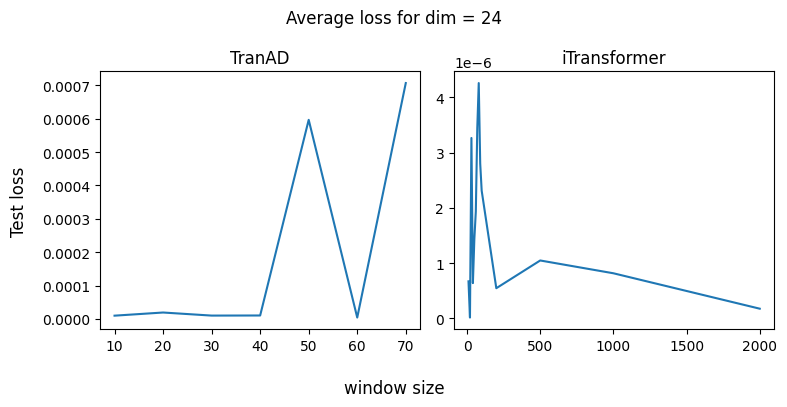

In [98]:
for dim in range(N):
	fig, axs = plt.subplots(1, 2, figsize=(8, 4))
	a_s1 = TranAD_all_res['loss'][:,dim]
	a_s2 = iTransf_all_res['loss'][:,dim]
	axs[0].plot(TranAD_n_windows, a_s1, label=f'dim = {dim}')
	axs[1].plot(iTransf_n_windows, a_s2, label=f'dim = {dim}')
	axs[0].set_title('TranAD')
	axs[1].set_title('iTransformer')
	fig.supxlabel('window size')
	fig.supylabel('Test loss')
	fig.suptitle(f'Average loss for dim = {dim}')
	plt.tight_layout()
	# plt.legend()
	# plt.savefig(f'{path}/{name}.png', dpi=300)
	plt.show()

In [113]:
print(TranAD_labels[0].shape)
len(TranAD_n_windows)

(8505, 25)


7

looking at dimension:  0


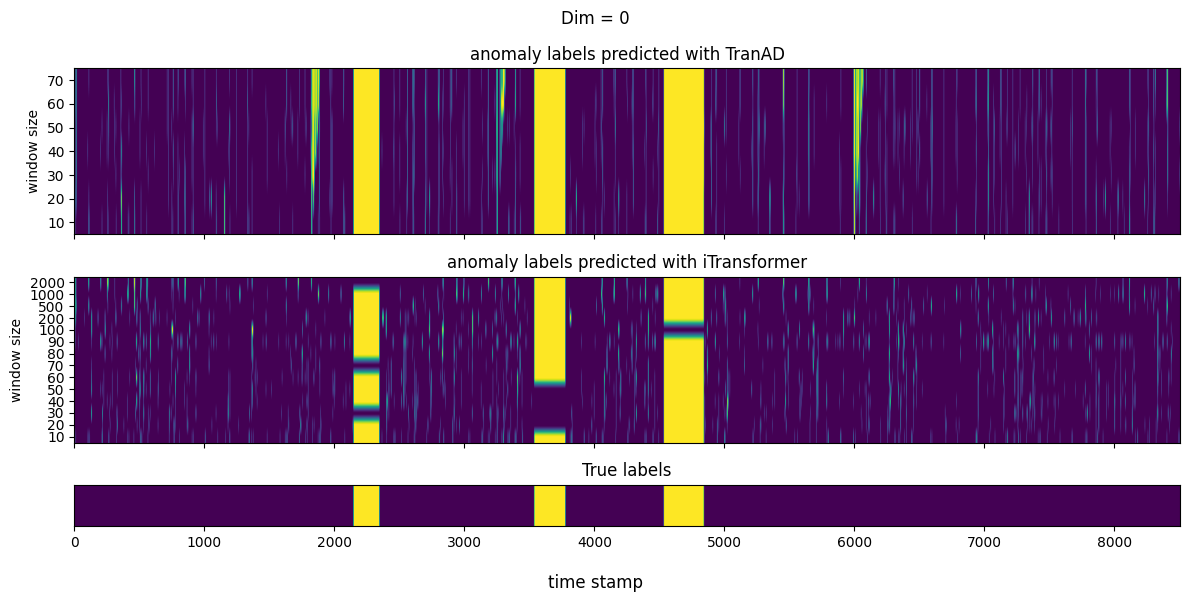

looking at dimension:  1


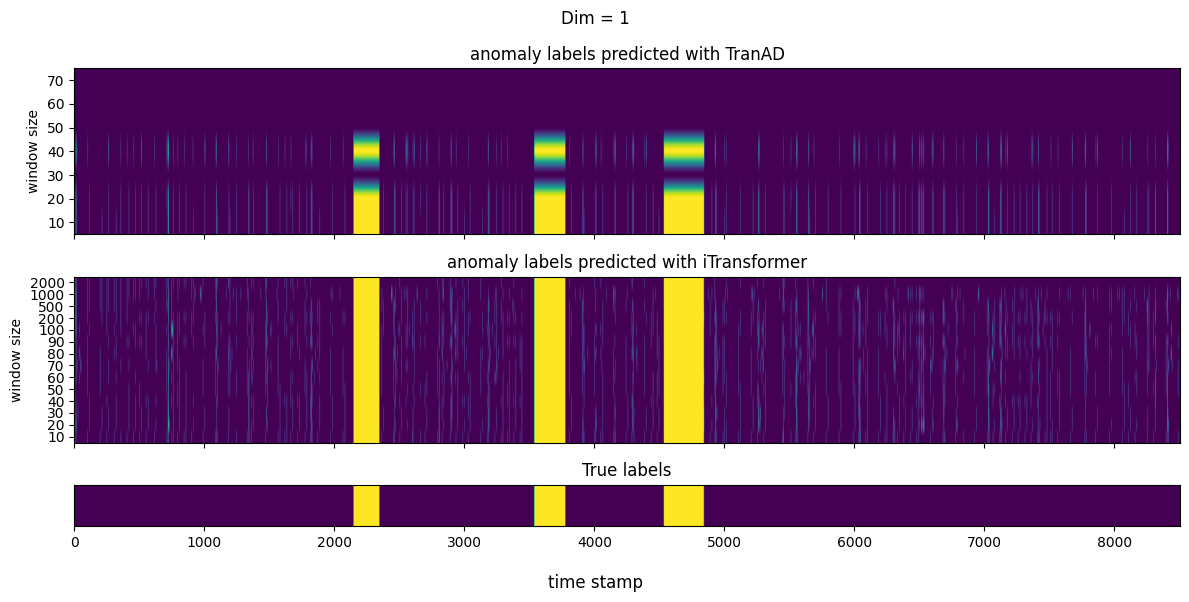

looking at dimension:  2


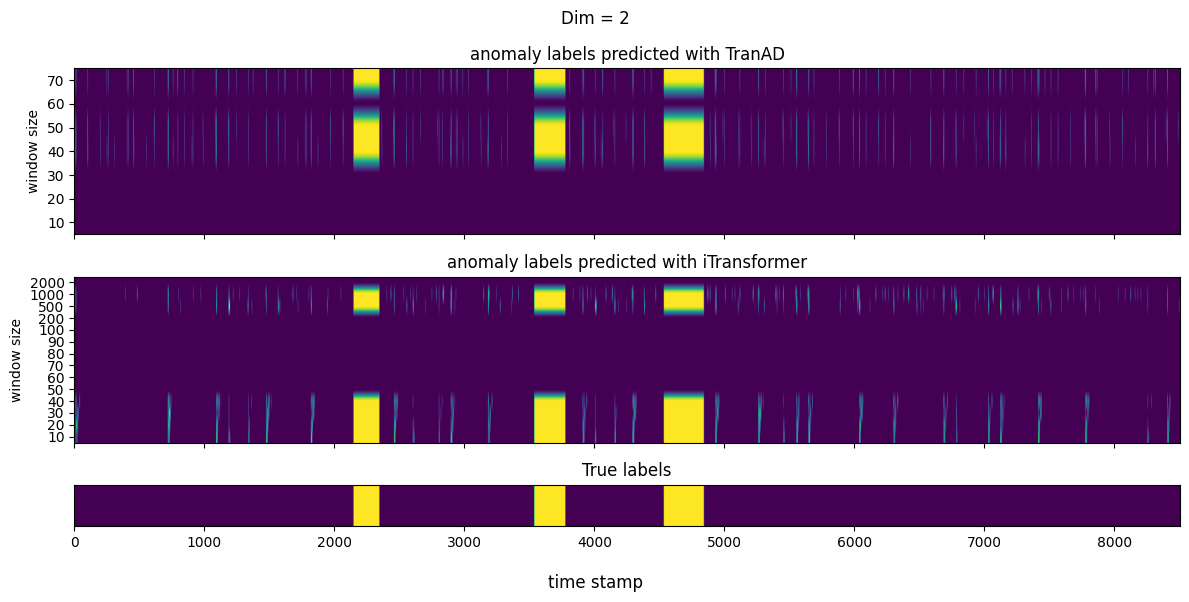

looking at dimension:  3


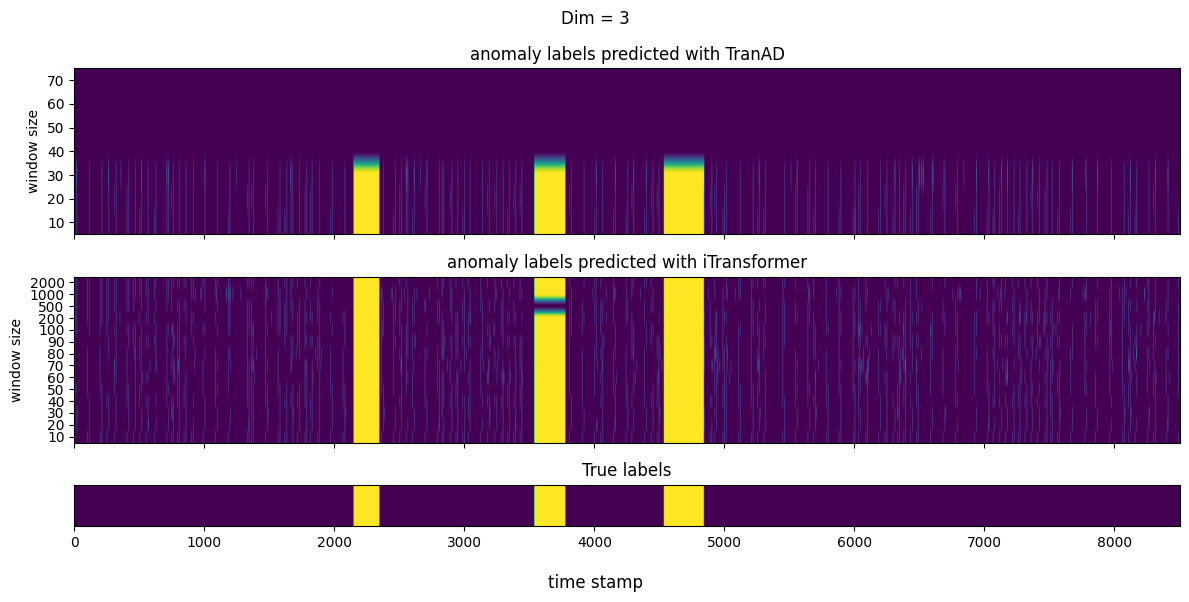

looking at dimension:  4


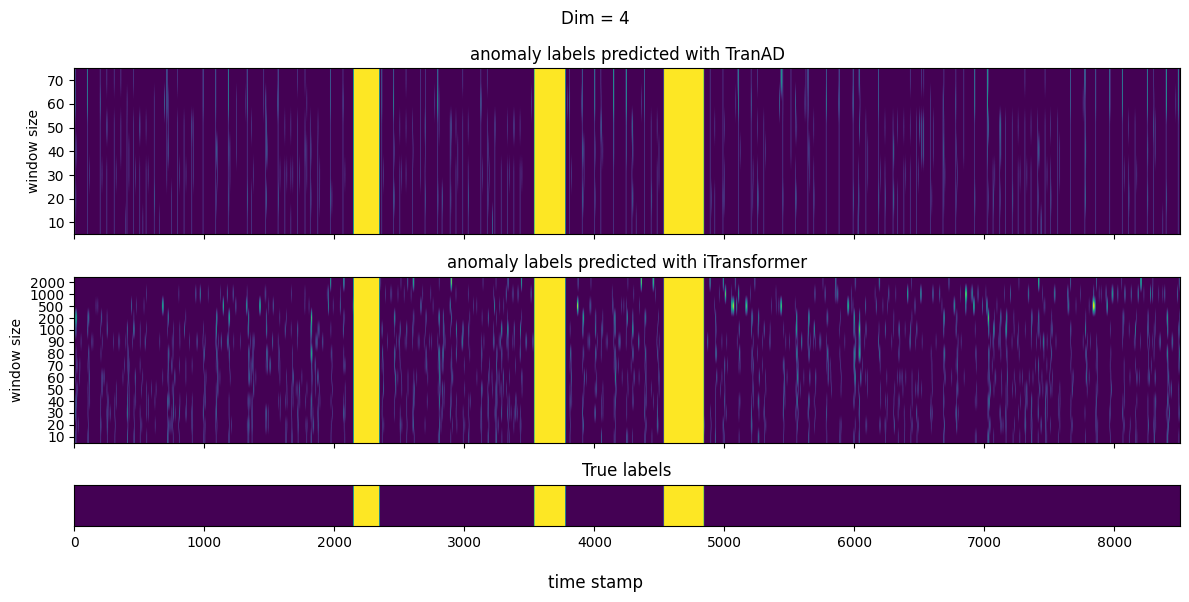

looking at dimension:  5


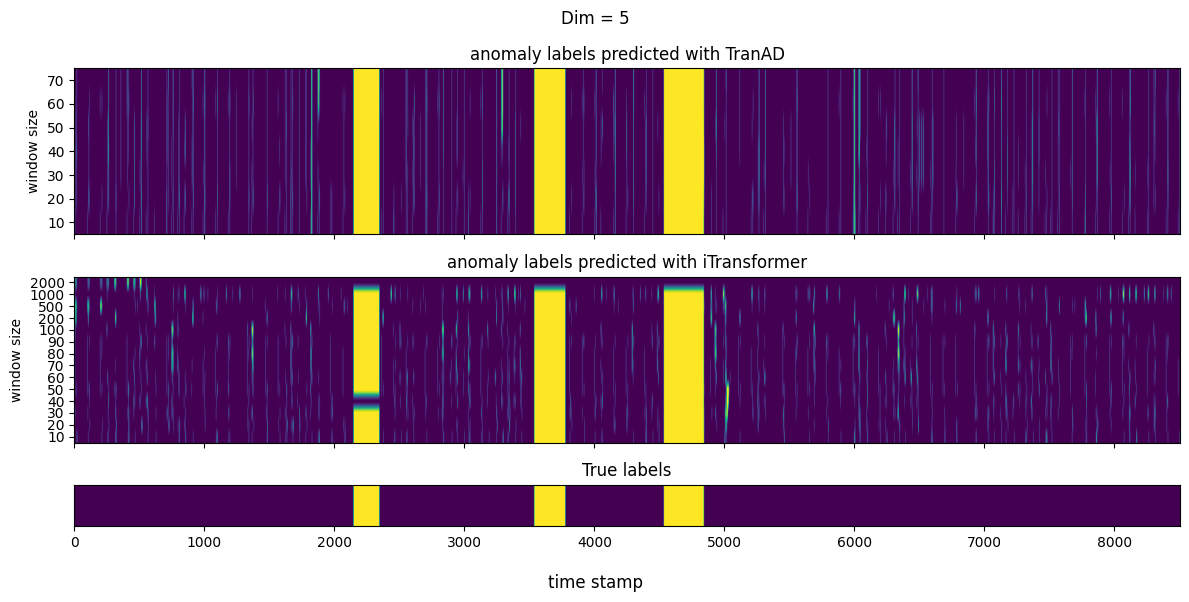

looking at dimension:  6


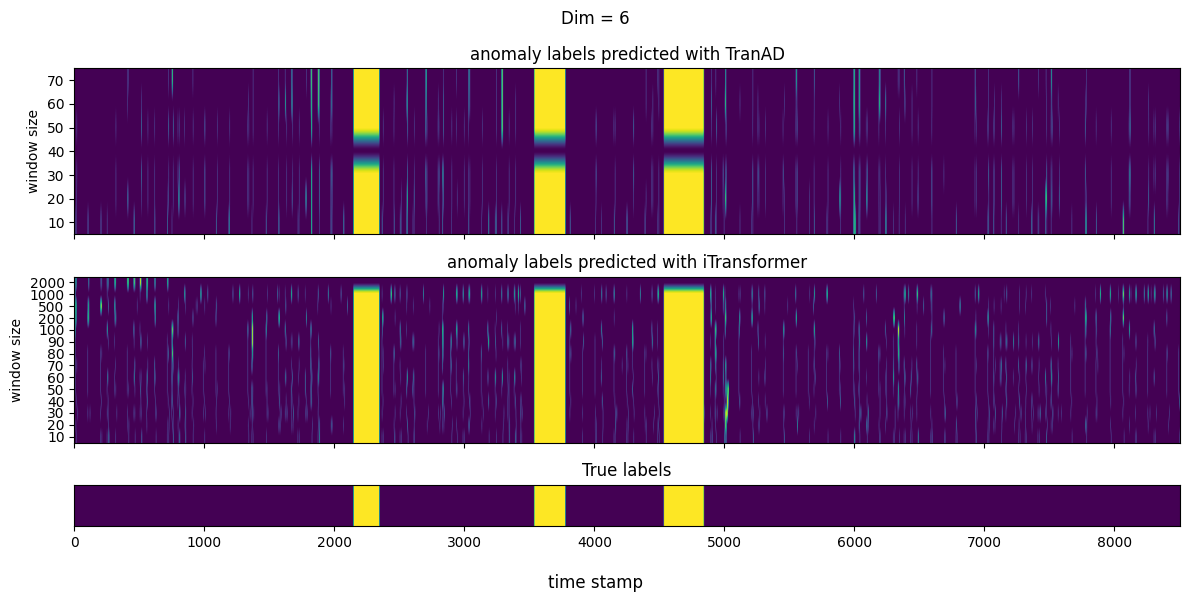

looking at dimension:  7


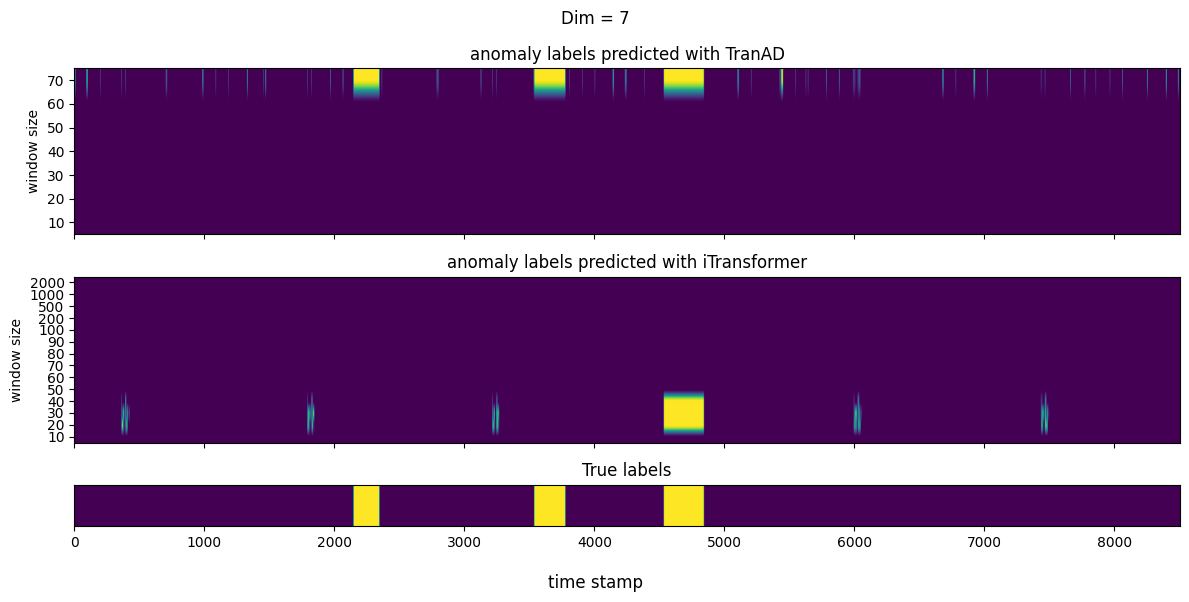

looking at dimension:  8


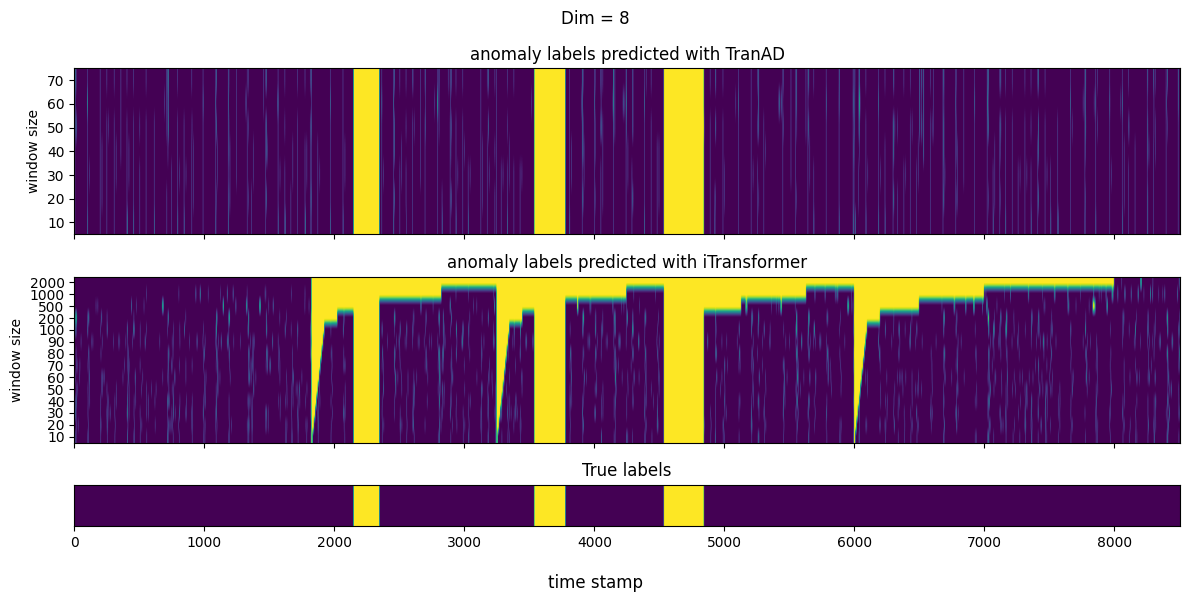

looking at dimension:  9


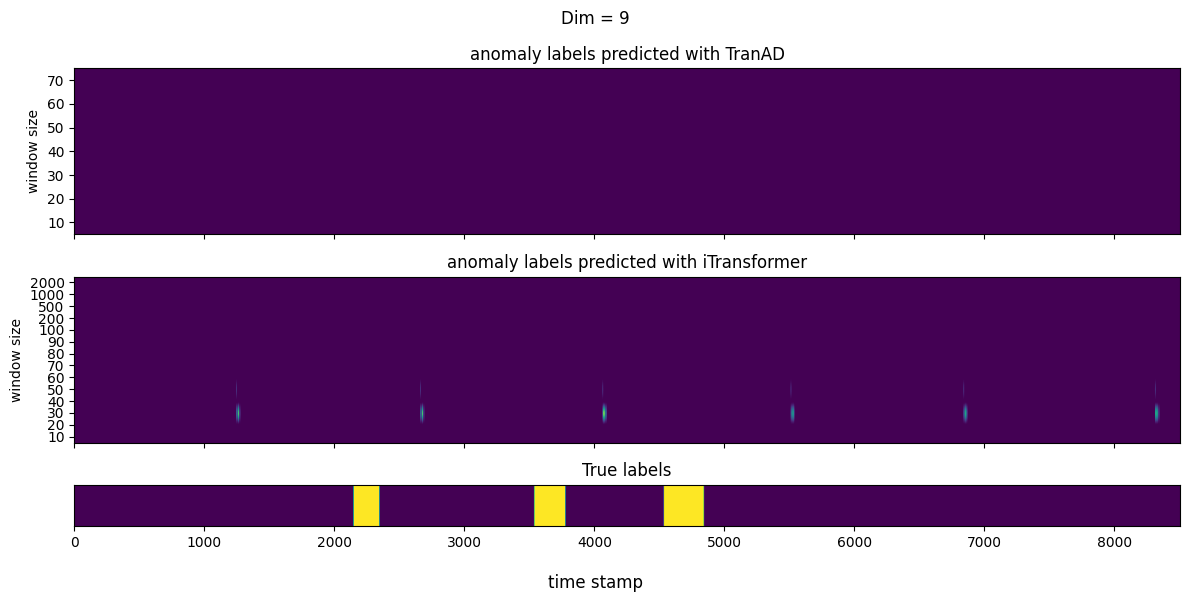

looking at dimension:  10


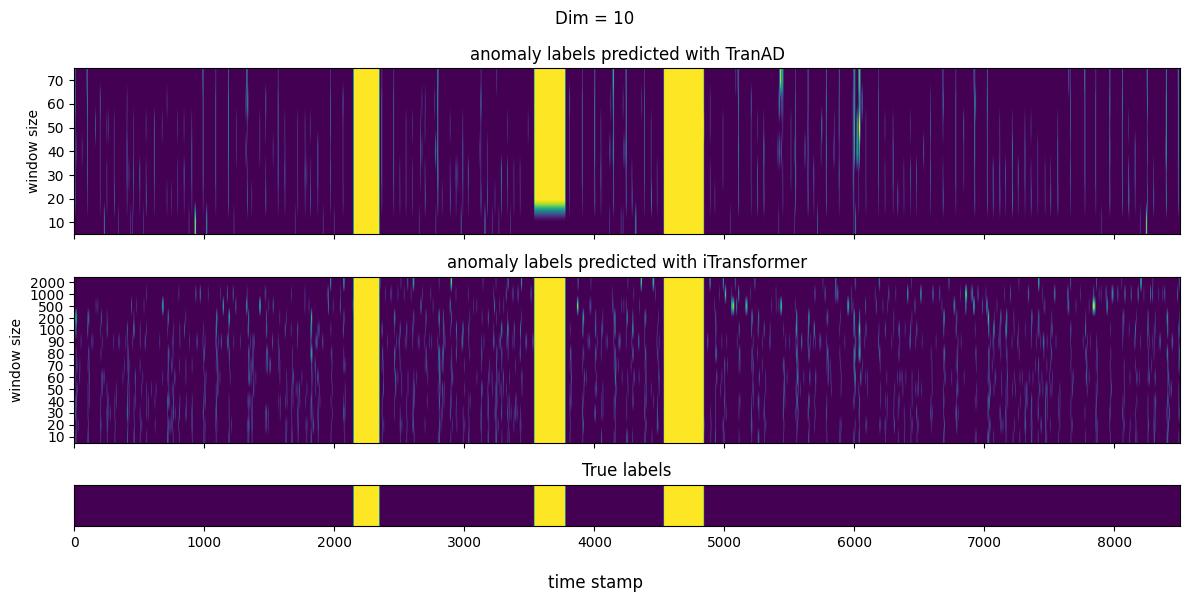

looking at dimension:  11


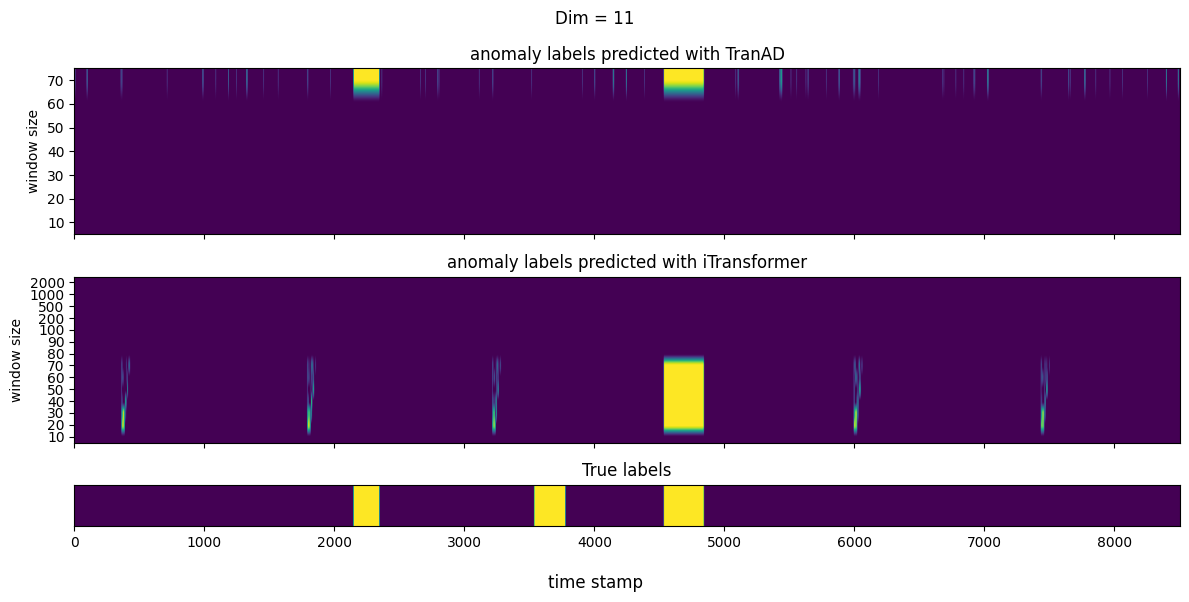

looking at dimension:  12


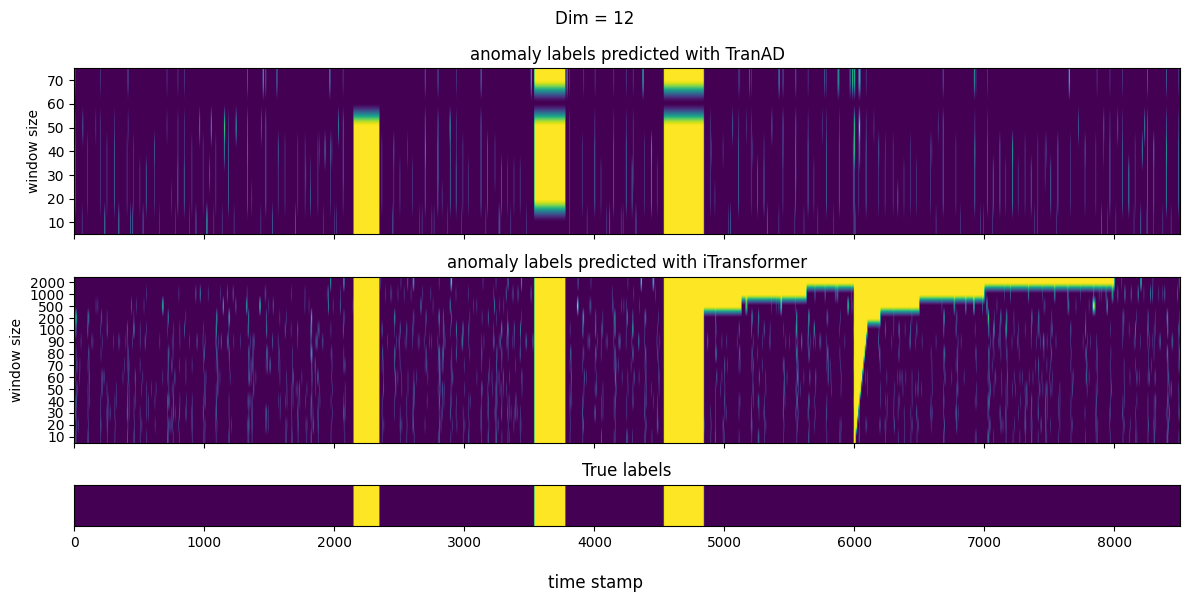

looking at dimension:  13


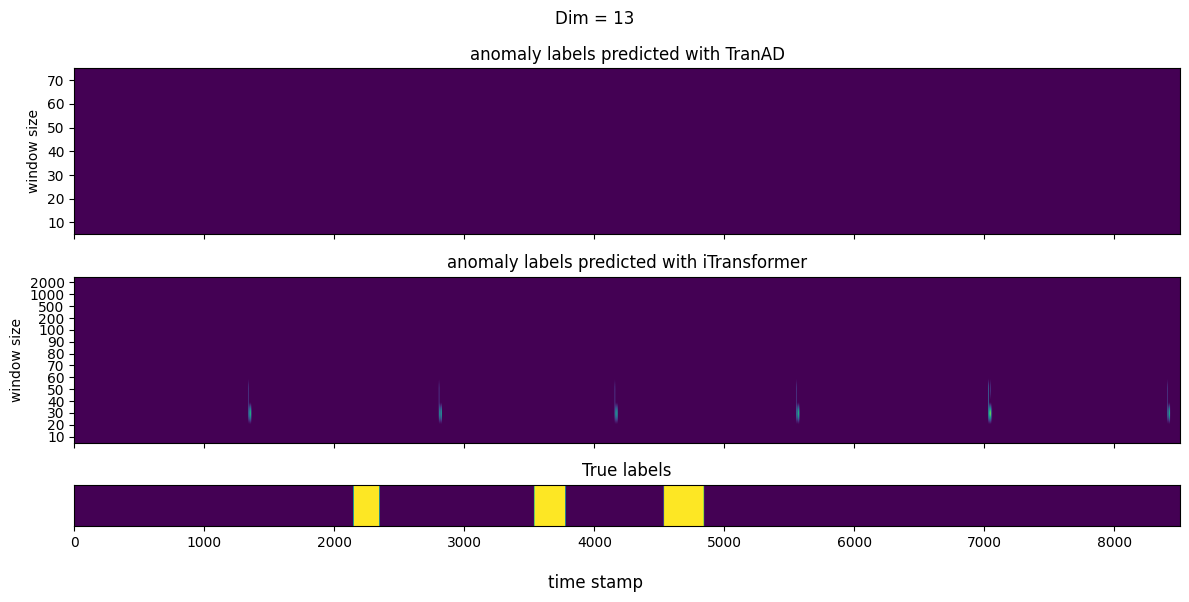

looking at dimension:  14


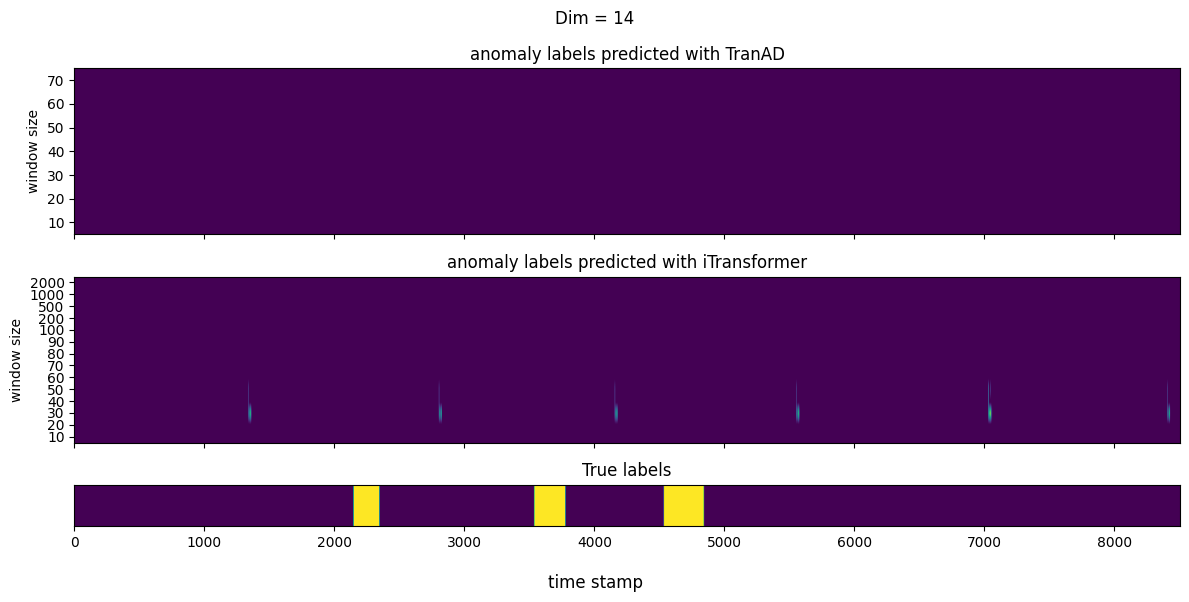

looking at dimension:  15


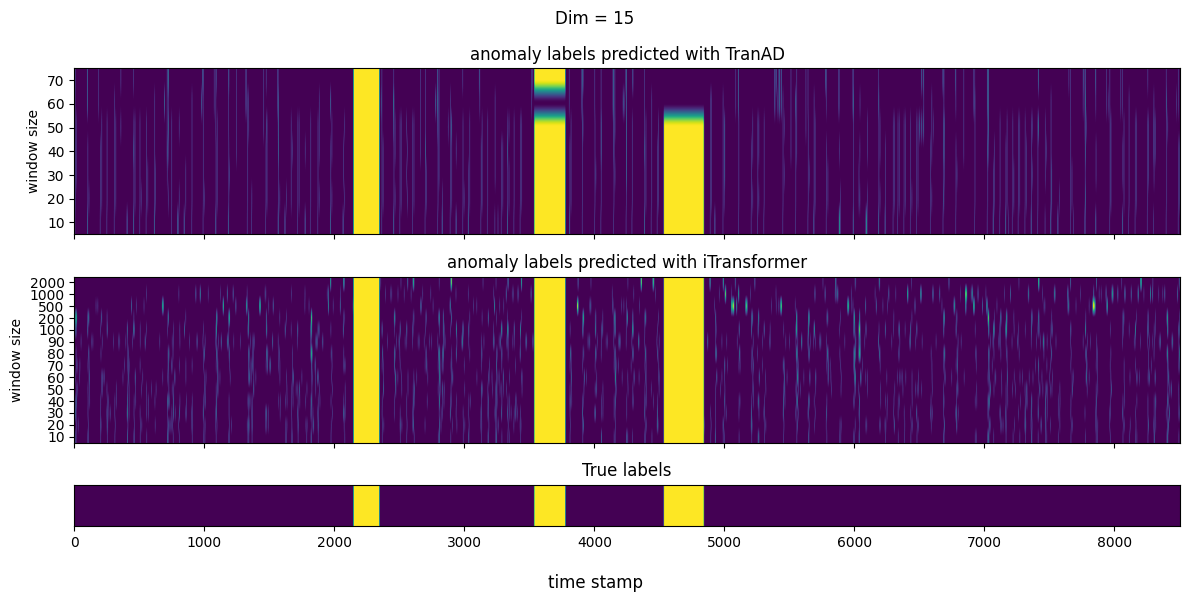

looking at dimension:  16


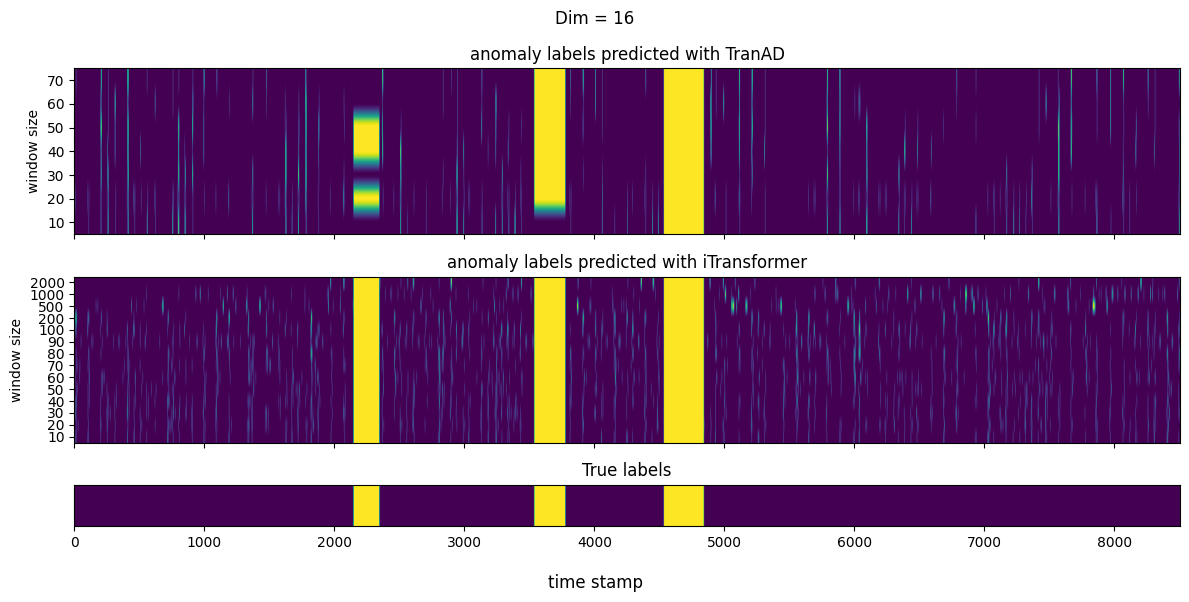

looking at dimension:  17


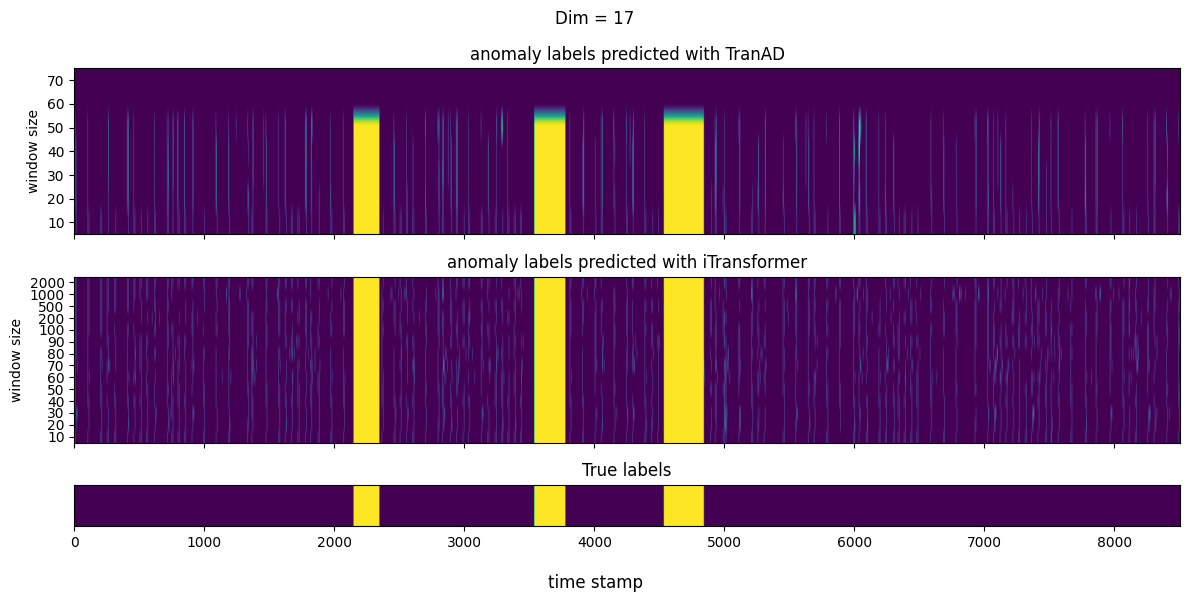

looking at dimension:  18


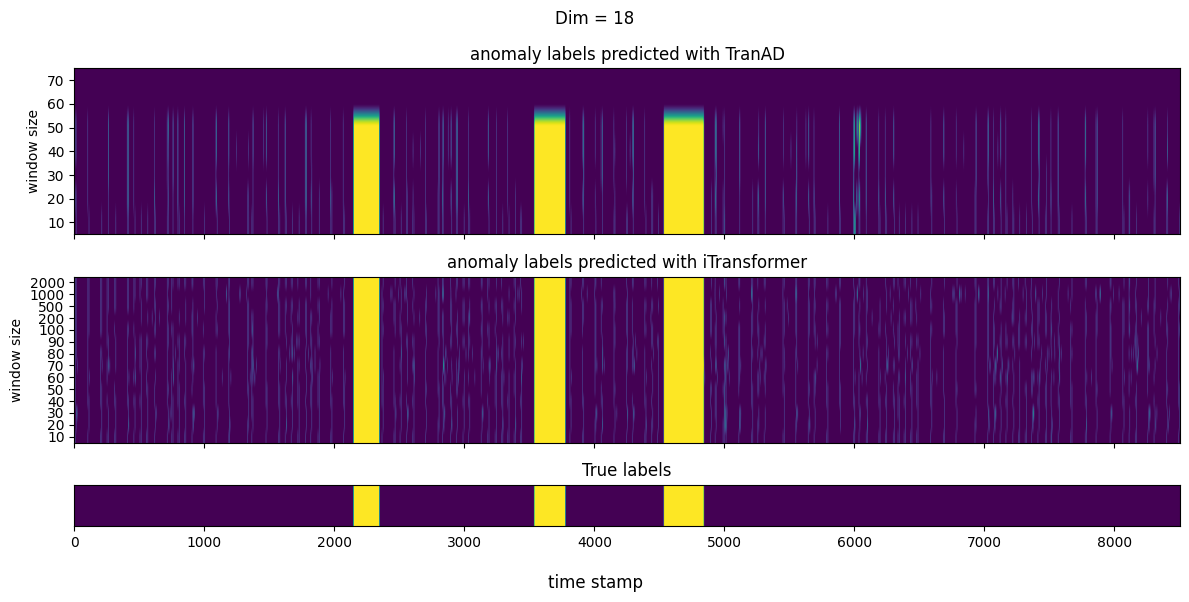

looking at dimension:  19


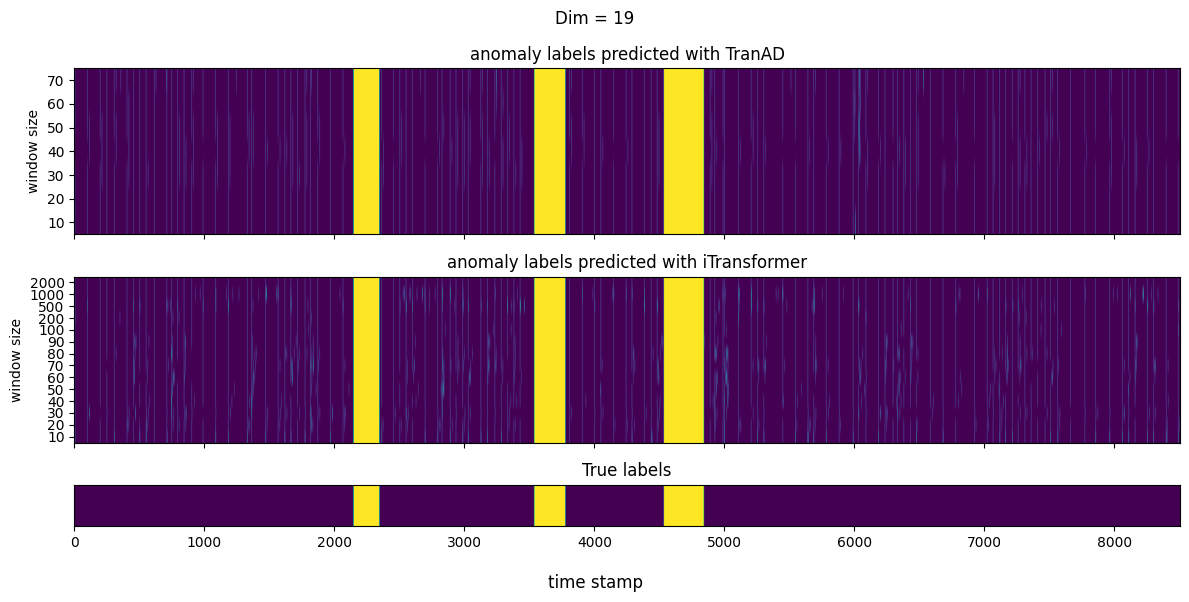

looking at dimension:  20


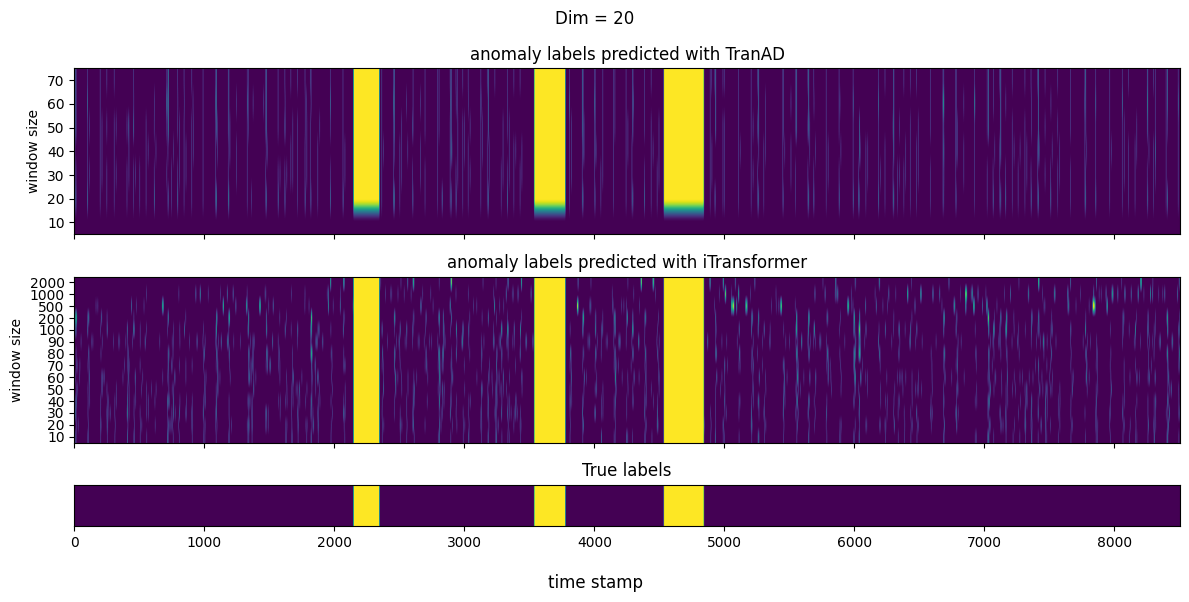

looking at dimension:  21


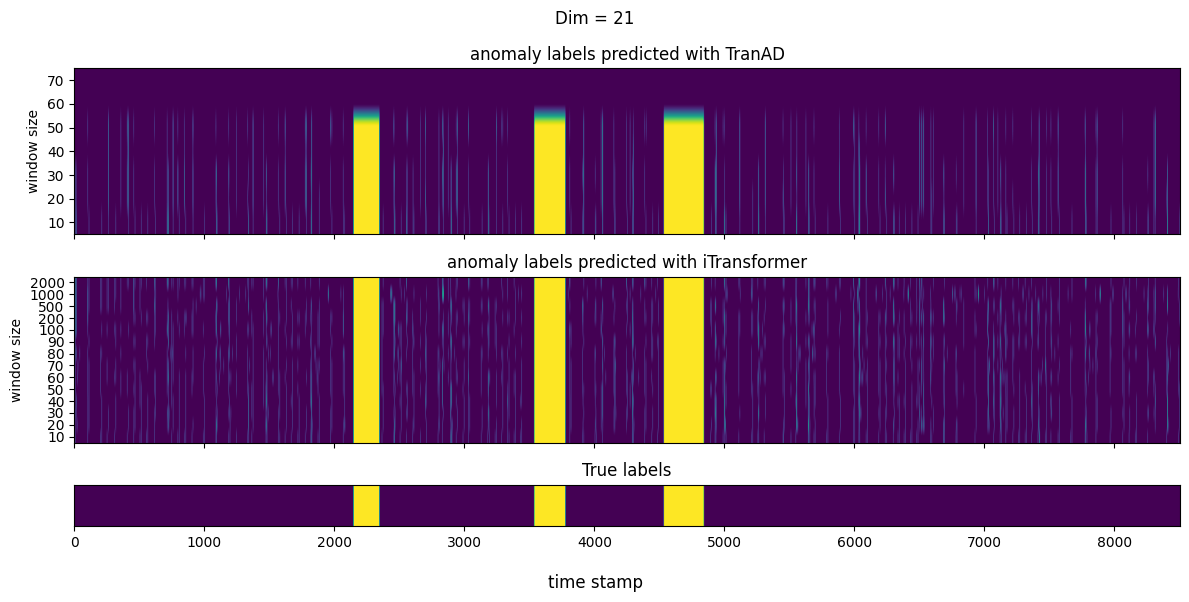

looking at dimension:  22


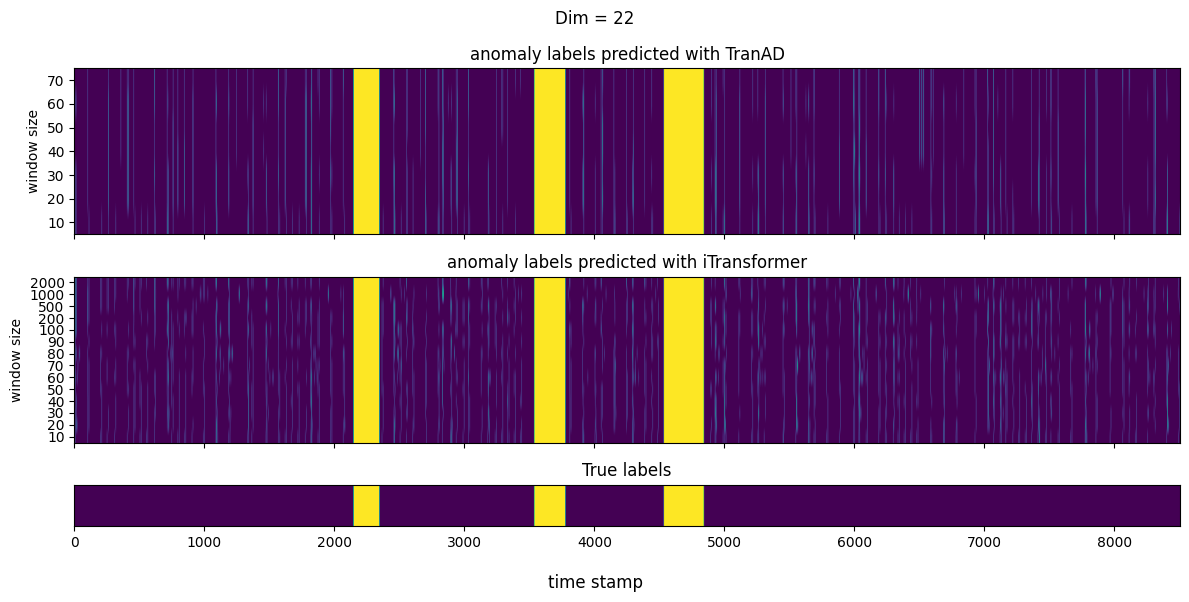

looking at dimension:  23


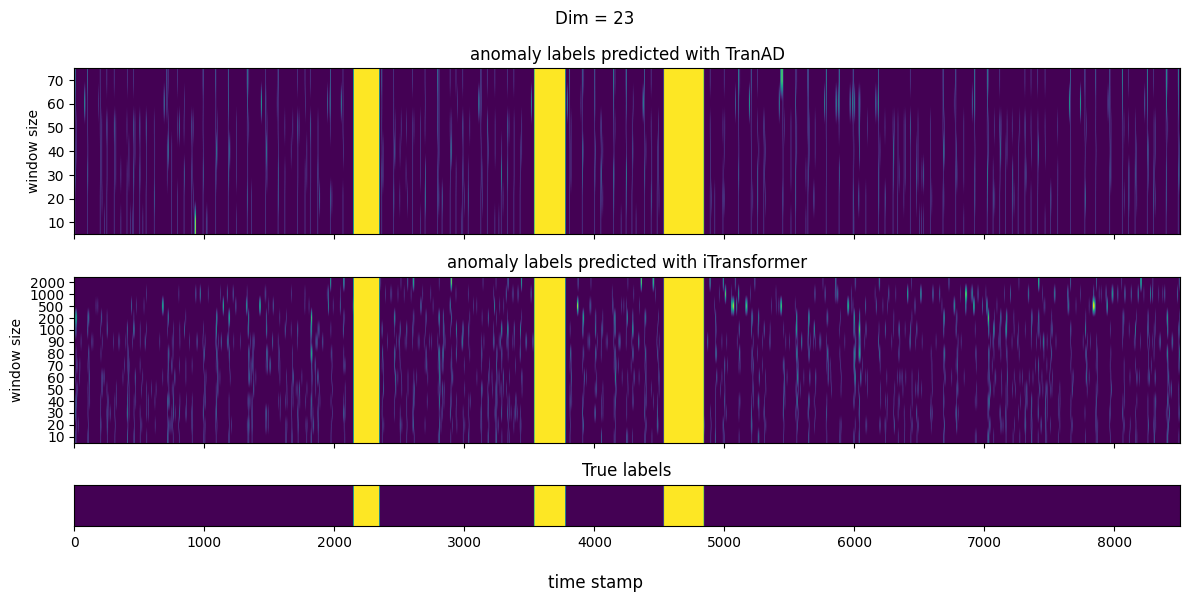

looking at dimension:  24


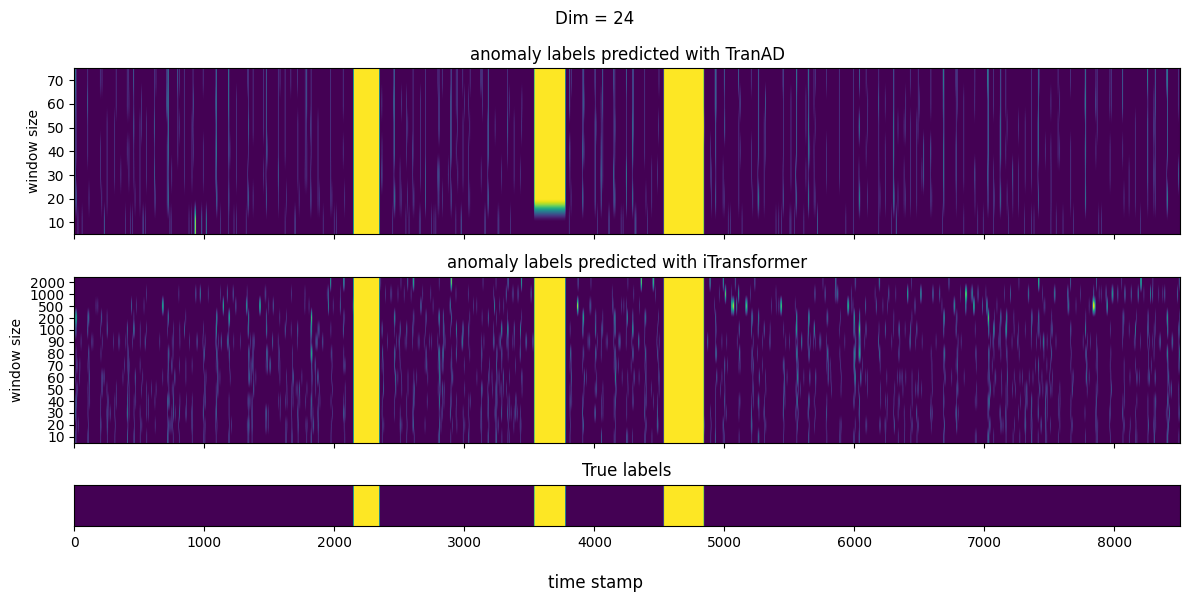

In [187]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

for dim in range(N):
	print('looking at dimension: ', dim)
	pred1 = []
	pred2 = []
	for i in range(len(TranAD_n_windows)):
		# print('adding window size ', TranAD_n_windows[i])
		# print(TranAD_labels[i][:,dim].shape)
		pred1.append(TranAD_labels[i][:,dim])
	for i in range(len(iTransf_n_windows)):
		# print('adding window size ', iTransf_n_windows[i])
		# print(iTransf_labels[i][:,dim].shape)
		pred2.append(iTransf_labels[i][:,dim])
	true = np.array(true_labels[0][:,dim]).T
	true = true[:, np.newaxis]

	fig, axs = plt.subplots(3, 1, figsize=(12,6), sharex=True, gridspec_kw={'height_ratios': [4, 4, 1]})
	im1 = axs[0].imshow(pred1, origin='lower', aspect='auto')
	axs[1].imshow(pred2, origin='lower', aspect='auto')
	axs[2].imshow(true.T, origin='lower', aspect='auto')
	axs[0].set_title('anomaly labels predicted with TranAD')
	axs[0].set_ylabel('window size')
	axs[0].set_yticks(ticks=np.arange(len(TranAD_n_windows)), labels=TranAD_n_windows)
	axs[1].set_title('anomaly labels predicted with iTransformer')
	axs[1].set_ylabel('window size')
	axs[1].set_yticks(ticks=np.arange(len(iTransf_n_windows)), labels=iTransf_n_windows)
	axs[2].set_title('True labels')
	axs[2].set_yticks(ticks=[])
	fig.supxlabel('time stamp')
	fig.suptitle(f'Dim = {dim}')
	# Create an axis on the right side of the figure for the colorbar
	# fig.colorbar(im1, ax=axs, orientation='vertical', shrink=0.6, fraction=0.1)
	plt.tight_layout()
	# plt.savefig(f'{path}/{name}.png', dpi=300)
	plt.show()
	# break